<a href="https://colab.research.google.com/github/YesenniaP/introducci-n-github/blob/main/Cocaine%20and%20Heroin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El dataset Cocaine and Heroin Prices.xlsx contine información sobre el precio de la cocaína y heroína durante los años 1990 - 2020 en Norte América especificamente en USA y en Europa Central y Occidental. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Mounted at /content/drive


In [5]:
filename = "/content/drive/MyDrive/Data Science/datos/Cocaine and Heroin Prices.xlsx"
df = pd.read_excel(filename)
df.head()


,Sub Region,Country,Drug,Year,Wholesale Price,Retail Price
0,North America,United States of America,Cocaine,1990,48300.0,79.95
1,North America,United States of America,Cocaine,1991,48100.0,76.58
2,North America,United States of America,Cocaine,1992,44730.0,72.79
3,North America,United States of America,Cocaine,1993,42180.0,74.11
4,North America,United States of America,Cocaine,1994,38640.0,68.01


In [4]:
df["Sub Region"].unique()

array(['North America', 'Western and Central Europe'], dtype=object)

Se puede observar que en este dataframe se obtiene 6 columnas en donde:
- **Sub Region**:
  * Descripción: Region del conteninente estudiado (Norte América y Europa Occidental y Central 
  * Tipo de dato: String
  * Limitantes: No debe haber nombres de paises, o regiones de continentes fuera del estudio objeto.

- **Country**: 
  * Descripción: Paises objeto donde vendian Cocaina y Heroina 
  * Tipo de dato: String
  * Limitantes: No debe haber nombres de pueblos, ciudades o comunas

- **Drug**:
  * Descripción: Tipo de droga
  * Tipo de dato: String
  * Limitantes: No se debe tener informacion al tipo de droga estudiada objetivo que son cocaína y heroina

- **Year**:
  * Descripción: Año del estudio 
  * Tipo de dato: Interger
  * Limitantes: Debe estar entre 1990 - 2020.

- **Wholesale Price**
  * Descripción: Precio al por mayor
  * Tipo de dato: Interger
  * Limitantes: no debe haber string.
  
- **Retail Price**
  * Descripción: precio al por menor
  * Tipo de dato: Interger
  * Limitantes: no debe haber string.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sub Region       1116 non-null   object 
 1   Country          1116 non-null   object 
 2   Drug             1116 non-null   object 
 3   Year             1116 non-null   int64  
 4   Wholesale Price  1116 non-null   float64
 5   Retail Price     1116 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 52.4+ KB


In [20]:
df.isna().sum()

Sub Region         0
Country            0
Drug               0
Year               0
Wholesale Price    0
Retail Price       0
dtype: int64

In [21]:
america_filter = df["Sub Region"]== "North America"
america_year = df.loc[america_filter, :].groupby(["Year"])["Retail Price"].max().sort_values(ascending=False)
america_year

Year
1992    480.52
1991    427.78
1994    399.68
1995    395.16
2020    393.85
2019    393.85
2018    393.85
1993    373.51
2017    360.85
1990    359.02
1997    357.01
1996    339.28
1998    322.75
2008    310.33
1999    310.18
2000    307.06
2016    293.64
2001    284.89
2002    282.35
2010    279.03
2009    274.89
2012    271.30
2003    267.88
2015    264.94
2014    264.68
2011    260.43
2013    259.59
2006    258.61
2005    255.61
2004    252.84
2007    229.52
Name: Retail Price, dtype: float64

In [22]:
AmericanYears = america_year.index
AmericanYears

American_price= america_year.values
American_price

array([480.52, 427.78, 399.68, 395.16, 393.85, 393.85, 393.85, 373.51,
       360.85, 359.02, 357.01, 339.28, 322.75, 310.33, 310.18, 307.06,
       293.64, 284.89, 282.35, 279.03, 274.89, 271.3 , 267.88, 264.94,
       264.68, 260.43, 259.59, 258.61, 255.61, 252.84, 229.52])

<function matplotlib.pyplot.show(*args, **kw)>

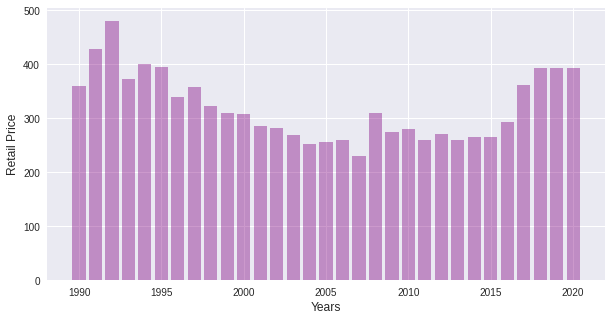

In [23]:
fig = plt.figure(figsize=(10, 5)) 
plt.style.use("seaborn")
plt.bar(AmericanYears, American_price, color="purple",alpha =.4)
plt.xlabel("Years", size = 12)
plt.ylabel("Retail Price", size =12)
plt.show

Se puede observar que en USA, el precio de venta al dental de cocaina y heroina, fue alto entre 1990 -1995, siendo 1992 el año con mayor precio en estas drogas. Tambien se puede observar como a partir del 2016 dichos precios vuelven a aumentar, pero genera una estabilidad de precio desde el 2018 equiparandose al precio que se tenia al principio de los años 90. 

Sin embargo es importante preguntarse, cual de estas dos drogas tiene mayor precio a lo largo de los años en estados unidos. 

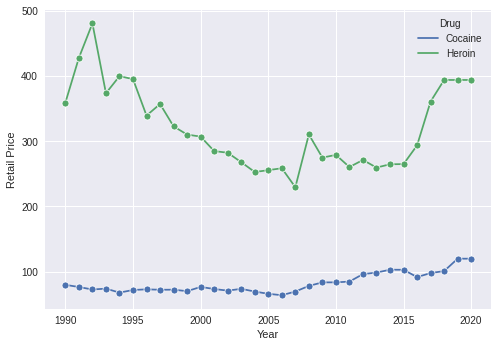

In [24]:
df1= df.loc[america_filter,:]
sns.lineplot(data=df1, x="Year", y="Retail Price", hue="Drug", marker="o")


Del grafico anterior podemos concluir que:

-La heroína es la droga mas costosa en comparación con la cocaina

-Podemos observar como a principios de los 90, la heroina tuvo su valor mas alto con un descenso a lo largo de los años, con nuevo ascenso a partir del 2015, estabilizandose para el 2018

-La cocaína ha presentado un comportamiento en precio de venta contstante hasta el 2005, despues de ello presenta aumento de precio, sin embargo siempre permanece por debajo de los precios de la heroina de forma considerable. 

Ya que se analizó el comportamiento de precios de la droga en norte america, es importante mirar dicho comportamiento en Europa central y occidental.

In [8]:
Europa_filter = df["Sub Region"]== "Western and Central Europe"
europa_year = df.loc[Europa_filter, :].groupby(["Year"])["Retail Price"].max().sort_values(ascending=False)
europa_year

Year
1990    1680.00
1992     770.00
1993     724.00
1991     696.00
1994     606.00
1995     455.00
1996     414.00
2012     306.00
2008     294.00
2007     274.00
2011     272.00
1997     257.00
1998     254.00
2005     252.00
2006     251.00
1999     250.00
2004     248.00
2020     227.79
2009     223.00
2010     214.00
2000     207.00
2013     200.00
2003     198.00
2014     197.00
2002     188.00
2018     177.00
2019     177.00
2001     170.00
2017     168.00
2016     166.00
2015     164.00
Name: Retail Price, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

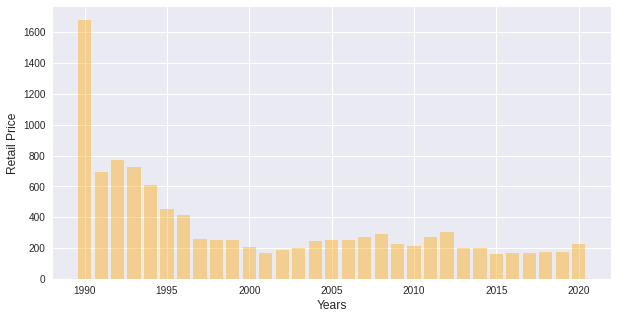

In [11]:
fig = plt.figure(figsize=(10, 5)) 
plt.style.use("seaborn")
plt.bar(europa_year.index, europa_year.values, color="orange",alpha =.4)
plt.xlabel("Years", size = 12)
plt.ylabel("Retail Price", size =12)
plt.show

En Europa central y occidental el precio de la droga, tiene gran costo en el año 1990 pero después de este año tiene una disminución del precio significativa, presentando una estabilización aparente en el precio después del 2012. 

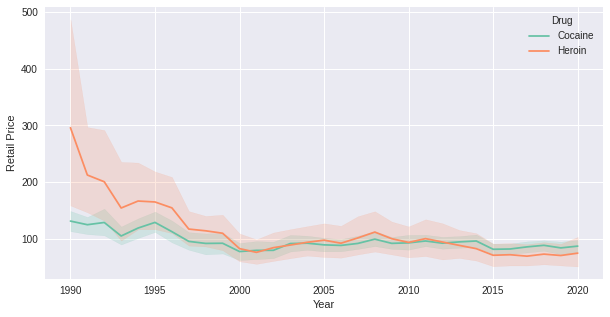

In [16]:
df2= df.loc[Europa_filter,:]
fig = plt.figure(figsize=(10, 5))
sns.lineplot(data=df2, x="Year", y="Retail Price", hue="Drug", palette="Set2")

En el gráfico anterior podemos observar como en 1990 la heroina fue la droga mas costosa, sin embargo a lo largo de los años esta se iguala a la cocaina e incluso despues del 2010, la heroína disminuye su precio por debajo del precio de la cocaina.
Tambien podemos ver como los precios de las drogas no superan $100. 

Ahora bien, es importante ver el comportamiento de precio de dichas drogas entre norteamerica y europa central y occidental. 

Text(0.5, 1.0, 'Western and Central Europe')

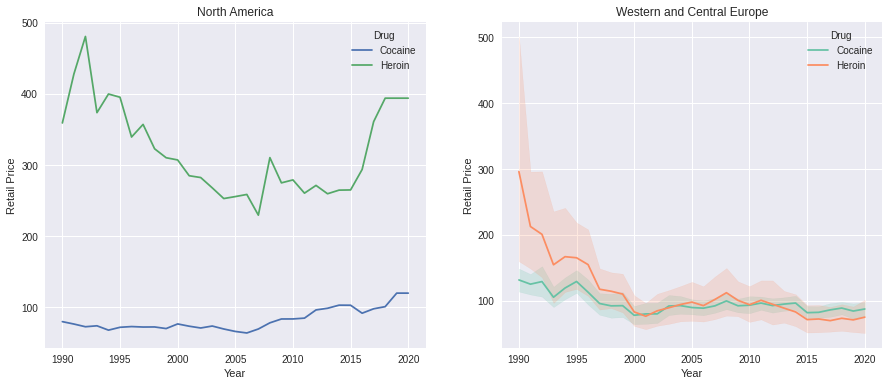

In [34]:
fig = plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.lineplot(data=df1, x="Year", y="Retail Price", hue="Drug")
plt.title("North America")

plt.subplot(1,2,2)
sns.lineplot(data=df2, x="Year", y="Retail Price", hue="Drug", palette="Set2")
plt.title("Western and Central Europe")


Podemos observar como el precio de la heroína en USA es mas costosa que en europa central y occidental, incluso la cocaína maneja precios un poco mas elevados que en europa. 

También se puede apreciar que el precio de ambas drogas en USA tienen una diferencia en precios cuantioso, mientras que en europa central y occidental dicha diferencia no es aprecibale, tanto que para el periodo de 2000-2015 llegan a igualarse los precios.

